In [0]:
import numpy as np, matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras

In [0]:
from keras.datasets import cifar10

In [0]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [0]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [0]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [0]:
x_train[0]

#this is how a computer see the pic. For example [59, 62, 63] => [R, G, B]. 59 is the red wavelength, 62 is the green wave length, 63 is the blue wavelength. This is the first pixel of the pic and all these series of pixels make a pic.

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

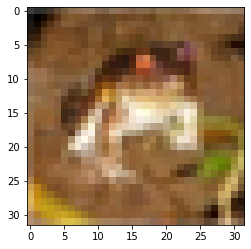

In [0]:
img1 = plt.imshow(x_train[0])

#x_train consists of image

In [0]:
print(y_train[0])

# y_train consists of label of the image

[6]


In [0]:
#One-Hot Encoding to convert the labels into a set of 10 numbers to input into the neural network. 

from keras.utils import to_categorical
y_train_encode = to_categorical(y_train)
y_test_encode = to_categorical(y_test)

In [0]:
print(y_train_encode[0])

# after encoding the label of image. before encoding the range of labels is 0 to 9. After encoding the one is encoded to 6th label and the remaining will be zeros.

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
# normalization of pixels as they ranges from 0 to 255

x_train = x_train / 255

x_test = x_test / 255

In [0]:
# model building

from keras.models import Sequential
from keras.layers import Dense, Flatten, MaxPooling2D, Conv2D

model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3), name = 'Convolutional_layer'))

#first layer, a convolution layer to extract features from the input image, and we are creating 32channels and 5 x 5 ReLu convoluted features also known as feature maps. we need to give the input shape.

In [0]:
# second layer, Maxpooling layer

model.add(MaxPooling2D(pool_size=(2,2)))

#  our image is (32,32) and this layer is used to convert that to 16x16

In [0]:
#we can make another convolutional layer and pooling layer and now we should not give input shape as its not our first layer
model.add(Conv2D(32, (5, 5), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
# Flatten layer. it'll help in converting the array into 1-dimension vector and feed to the neural network

model.add(Flatten())
model.add(Dense(50, activation='relu'))# name = Hidden_layer
model.add(Dense(10, activation='softmax'))# name = Output_layer

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Convolutional_layer (Conv2D) (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        25632     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                40050     
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
# training the model

CNN_model = model.fit(x_train, y_train_encode, 
           batch_size=256, epochs=10, validation_split=0.3 )

#batch_size is the number of training samples

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 45s 1ms/step - loss: 1.8217 - accuracy: 0.3402 - val_loss: 1.6284 - val_accuracy: 0.4120
Epoch 2/10
35000/35000 [==============================] - 44s 1ms/step - loss: 1.4934 - accuracy: 0.4657 - val_loss: 1.4705 - val_accuracy: 0.4665
Epoch 3/10
35000/35000 [==============================] - 44s 1ms/step - loss: 1.3642 - accuracy: 0.5129 - val_loss: 1.3672 - val_accuracy: 0.5133
Epoch 4/10
35000/35000 [==============================] - 44s 1ms/step - loss: 1.2822 - accuracy: 0.5458 - val_loss: 1.3134 - val_accuracy: 0.5335
Epoch 5/10
35000/35000 [==============================] - 44s 1ms/step - loss: 1.2372 - accuracy: 0.5627 - val_loss: 1.2412 - val_accuracy: 0.5600
Epoch 6/10
35000/35000 [==============================] - 44s 1ms/step - loss: 1.1887 - accuracy: 0.5813 - val_loss: 1.2124 - val_accuracy: 0.5747
Epoch 7/10
35000/35000 [==============================] - 44s 1ms/st

In [0]:
model.evaluate(x_test, y_test_encode)[1]

10000/10000 [==============================] - 4s 411us/step


0.6115999817848206

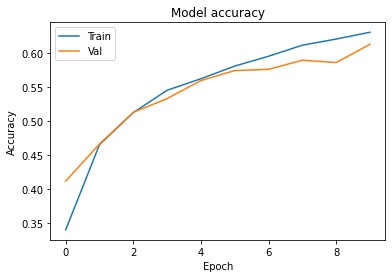

In [0]:
#Visualize the models accuracy
plt.plot(CNN_model.history['accuracy'])
plt.plot(CNN_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

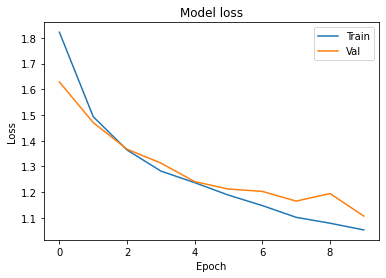

In [0]:
#Visualize the models accuracy
plt.plot(CNN_model.history['loss'])
plt.plot(CNN_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

In [0]:
# Testing our model

from google.colab import files
uploaded = files.upload() # Use to load data on Google Colab
test_imp= plt.imread("dog.jpg")

Saving dog.jpg to dog.jpg


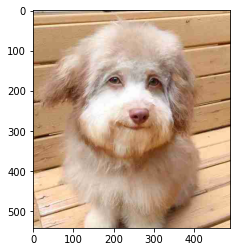

In [0]:
img = plt.imshow(test_imp)

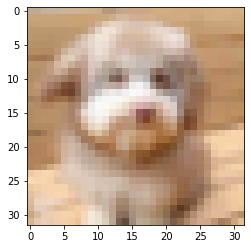

In [0]:
from skimage.transform import resize
image_resized = resize(test_imp, (32,32,3)) 
img = plt.imshow(image_resized)

In [0]:
probabilities = model.predict(np.array( [image_resized,] ))

In [0]:
probabilities

array([[0.00701506, 0.00179045, 0.26885432, 0.10411952, 0.01815417,
        0.3759597 , 0.05465802, 0.1662967 , 0.0022896 , 0.00086257]],
      dtype=float32)

In [0]:
index = np.argsort(probabilities[0,:])

In [0]:
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: dog -- Probability: 0.3759597
Second most likely class: bird -- Probability: 0.26885432
Third most likely class: horse -- Probability: 0.1662967
Fourth most likely class: cat -- Probability: 0.10411952
Fifth most likely class: frog -- Probability: 0.054658018
